In [4]:
%cd /teamspace/studios/this_studio/2024/07/flood_prediction_notebook/flood_prediciton_code

/teamspace/studios/this_studio/2024/07/flood_prediction_notebook/flood_prediciton_code


/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [5]:
import pandas as pd
import numpy as np

In [6]:
raw_train = pd.read_csv('../data/train.csv')

In [7]:
    
INITIAL_FEATURES = ['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors']

In [8]:
def create_features_4(data):
    df = data.copy()

    df['fsum'] = df[INITIAL_FEATURES].sum(axis=1) # for tree models
    df['special1'] = df['fsum'].isin(np.arange(72, 76)) # for linear models

    log_features = [f"log_{col}" for col in INITIAL_FEATURES]
    log2_features = [f"log_{col}" for col in INITIAL_FEATURES]

    exp_features = [f"exp_{col}" for col in INITIAL_FEATURES]
    exp2_features = [f"exp2_{col}" for col in INITIAL_FEATURES]
    exp3_features = [f"exp3_{col}" for col in INITIAL_FEATURES]
    exp4_features = [f"exp4_{col}" for col in INITIAL_FEATURES]
    new_cols = []

    df['fsum2'] = df[INITIAL_FEATURES].product(axis=1)
    df['zero_count'] = (df[INITIAL_FEATURES] < 10).sum(axis=1)
    df['one_count'] = (df[INITIAL_FEATURES] > 10).sum(axis=1)
    
    df['special2'] = df['fsum2'].isin(np.arange(72, 76)) 

    for col in INITIAL_FEATURES:
        df[f"log_{col}"] = np.log1p(df[col]+1e-4)  
    df['log_sum'] = df[log_features].sum(axis=1)

    for col in INITIAL_FEATURES:
        df[f"log2_{col}"] = np.log2(df[col]+1e-4)  
    df['log2_sum'] = df[log2_features].sum(axis=1)

    for col in INITIAL_FEATURES:
        df[f"exp_{col}"] = 1.2**(df[col])

    df['exp_sum'] = df[exp_features].sum(axis=1)
    df['exp_prod'] = df[exp_features].product(axis=1)

    for col in INITIAL_FEATURES:
        df[f"exp2_{col}"] = np.exp(df[col])
    df['exp2_sum'] = df[exp2_features].sum(axis=1)


    for col in INITIAL_FEATURES:
        df[f"exp3_{col}"] = 4**(df[col])
    df['exp3_sum'] = df[exp3_features].sum(axis=1)

    for col in INITIAL_FEATURES:
        df[f"exp4_{col}"] = 6**(df[col])
    df['exp4_sum'] = df[exp4_features].sum(axis=1)

    feats = list(INITIAL_FEATURES)+['fsum','one_count','fsum2','exp_sum','log_sum','log2_sum','exp2_sum','exp3_sum']
    df = df[feats]
    return df 

In [9]:
df = create_features_4(raw_train)

/tmp/ipykernel_52691/2042723569.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"exp3_{col}"] = 4**(df[col])
/tmp/ipykernel_52691/2042723569.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[f"exp3_{col}"] = 4**(df[col])
/tmp/ipykernel_52691/2042723569.py:42: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newfram

In [10]:
raw_train.columns

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')

In [11]:
df.head()

,MonsoonIntensity,TopographyDrainage,RiverManagement,Deforestation,Urbanization,ClimateChange,DamsQuality,Siltation,AgriculturalPractices,Encroachments,...,InadequatePlanning,PoliticalFactors,fsum,one_count,fsum2,exp_sum,log_sum,log2_sum,exp2_sum,exp3_sum
0,5,8,5,8,6,4,4,3,3,4,...,7,3,94,0,7315660800000,49.567980,33.926259,33.926259,9626.886221,174416
1,6,7,4,4,8,8,3,5,4,6,...,4,3,94,0,0,51.248784,32.799550,32.799550,17689.159465,437585
2,6,5,6,7,3,7,1,5,4,5,...,3,3,99,0,10081895040000,52.155356,34.412432,34.412432,9719.906067,152084
3,3,4,6,5,4,8,4,7,6,8,...,7,5,104,0,72831467520000,53.870008,35.779424,35.779424,11410.817959,198224
4,5,3,2,6,4,4,3,3,3,3,...,3,5,72,0,20155392000,39.971712,29.447171,29.447171,1972.108036,16580


In [12]:
import matplotlib.pyplot as plt

In [13]:
df['FloodProbability'] = raw_train['FloodProbability']

In [14]:
import seaborn as sns

In [15]:
df.columns

Index(['MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'fsum', 'one_count', 'fsum2',
       'exp_sum', 'log_sum', 'log2_sum', 'exp2_sum', 'exp3_sum',
       'FloodProbability'],
      dtype='object')

In [16]:
# sns.boxplot(x="log_sum", y="FloodProbability", data=df)

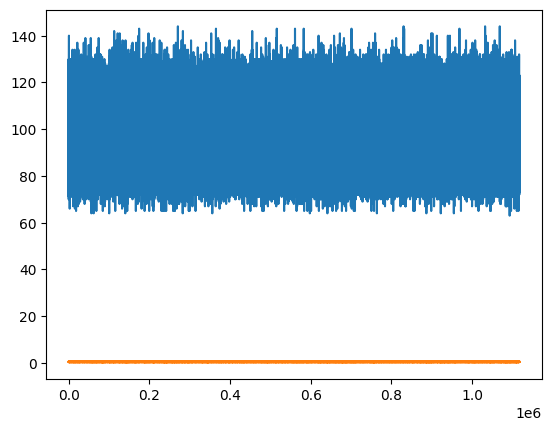

In [24]:
plt.plot(df[['fsum','FloodProbability']])

<Axes: xlabel='fsum', ylabel='Count'>

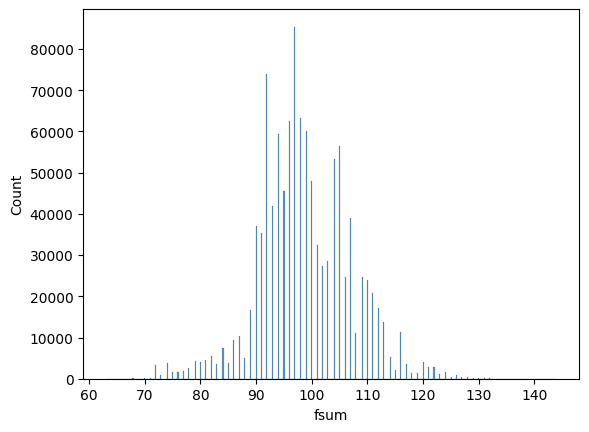

In [25]:
sns.histplot(df['fsum'])

In [26]:
df['fsum'].describe()

count    1.117957e+06
mean     9.878823e+01
std      8.307287e+00
min      6.300000e+01
25%      9.400000e+01
50%      9.800000e+01
75%      1.040000e+02
max      1.440000e+02
Name: fsum, dtype: float64